In [1]:
pip install --user matplotlib

You are using pip version 9.0.3, however version 21.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import statistics 

In [61]:
from optibook.synchronous_client import Exchange

In [62]:
e = Exchange()
a = e.connect()

2021-01-24 13:26:06,109 [asyncio   ] [MainThread  ] Using selector: EpollSelector
2021-01-24 13:26:06,112 [client    ] [Thread-13   ] background thread started
2021-01-24 13:26:06,122 [client    ] [Thread-13   ] opened connection
2021-01-24 13:26:06,124 [client    ] [Thread-13   ] start read <StreamReader t=<_SelectorSocketTransport fd=181 read=polling write=<idle, bufsize=0>>>
2021-01-24 13:26:06,126 [client    ] [Thread-13   ] logged in!
2021-01-24 13:26:06,271 [client    ] [Thread-12   ] Forcing a disconnect due to an error: Closing connection because someone else logged in with the same credentials. Only one session may be active at the same time.


In [63]:
IA = 'PHILIPS_A'
IB = 'PHILIPS_B'

In [64]:
def moving_avg_bids(price_book):
    average = []
    t_end = time.time() + 5
    while time.time() < t_end:
        for i in price_book.bids:
            average.append(i.price)
    return sum(average)/len(average)

In [65]:
def moving_avg_asks(price_book):
    average = []
    t_end = time.time() + 5
    count = 0
    while time.time() < t_end:
        for i in price_book.asks:
            average.append(i.price)
    return sum(average)/len(average)

In [ ]:
def mean_bid_ask_diagram(instrument_id):
    res = []
    t_end = time.time() + 100
    while time.time() < t_end:
        book = e.get_last_price_book(instrument_id)
        res.append([time.time(), moving_avg_bids(book), moving_avg_asks(book)])
    print(res)
    res = np.array(res)
    fig,ax = plt.subplots(figsize=(10, 6))
    for col,lbl in zip([1,2], ['bid','ask']):
        ax.plot(res[:,0], res[:,col], label=lbl)
    ax.set_xlabel('time')
    plt.legend()
    plt.show()

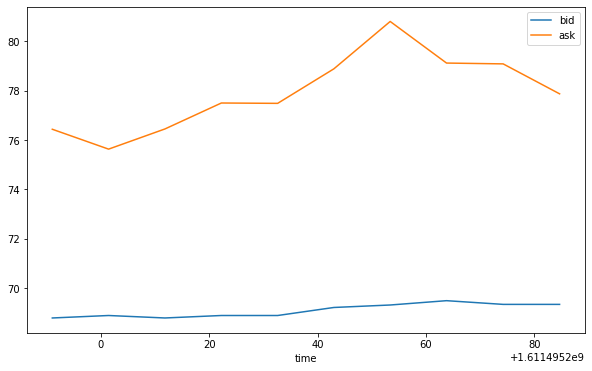

In [ ]:
def mean_bid_ask_spread_diagram():
    res = []
    t_end = time.time() + 100
    while time.time() < t_end:
        book_A = e.get_last_price_book(IA)
        book_B = e.get_last_price_book(IB)
        res.append([time.time(), moving_avg_bids(book_A), moving_avg_asks(book_B)])
    res = np.array(res)
    fig,ax = plt.subplots(figsize=(10, 6))
    for col,lbl in zip([1,2], ['bid','ask']):
        ax.plot(res[:,0], res[:,col], label=lbl)
    ax.set_xlabel('time')
    plt.legend()
    plt.show()
mean_bid_ask_spread_diagram()

[[1611495295.2913096, 69.46000001233098, 75.5800000079229], [1611495305.7056248, 69.5000000214201, 77.02500001603266], [1611495316.082322, 69.32500001158449, 76.92499999948613], [1611495326.4679296, 68.93333335696964, 74.4500000056037], [1611495337.0571294, 69.2200000096608, 75.4600000143946], [1611495347.4433634, 69.3714285814717, 75.54000000059582], [1611495357.8868165, 69.37142858168657, 76.85000000802515], [1611495368.3097472, 69.37142858159247, 74.56666667319325], [1611495378.7580779, 69.371428581617, 74.58333335199079], [1611495389.2003314, 69.37142858140311, 74.60000000793184]]


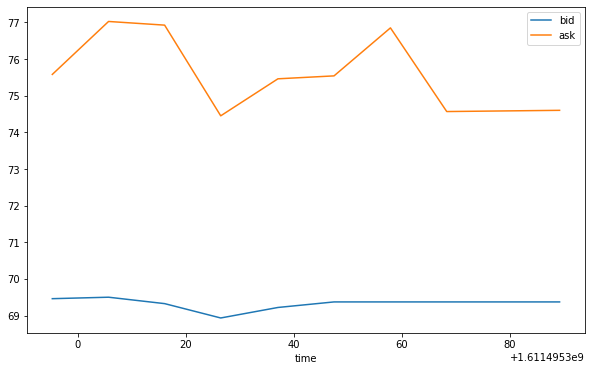

In [ ]:
mean_bid_ask_diagram(IA)

In [ ]:
mean_bid_ask_diagram(IB)